# **Logistic Regression**

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set,

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:

from google.colab import files

uploaded = files.upload()


import pandas as pd
import io

filename = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Read CSV file into DataFrame
print(df.head())

Saving titanic_train.csv to titanic_train (1).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

# **Exploratory Data Analysis**

In [30]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-30-5644c8b66765>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)
<ipython-input-30-5644c8b66765>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Age         891 non-null    float64 
 2   SibSp       891 non-null    int64   
 3   Parch       891 non-null    int64   
 4   Fare        891 non-null    float64 
 5   FamilySize  891 non-null    int64   
 6   FareBin     891 non-null    category
 7   Sex_male    891 non-null    bool    
 8   Embarked_Q  891 non-null    bool    
 9   Embarked_S  891 non-null    bool    
 10  Pclass_2    891 non-null    bool    
 11  Pclass_3    891 non-null    bool    
dtypes: bool(5), category(1), float64(2), int64(4)
memory usage: 47.3 KB


In [31]:
# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

In [32]:
# Drop unnecessary columns
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [33]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [34]:
# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Age         891 non-null    float64 
 2   SibSp       891 non-null    int64   
 3   Parch       891 non-null    int64   
 4   Fare        891 non-null    float64 
 5   FamilySize  891 non-null    int64   
 6   FareBin     891 non-null    category
 7   Sex_male    891 non-null    bool    
 8   Embarked_Q  891 non-null    bool    
 9   Embarked_S  891 non-null    bool    
 10  Pclass_2    891 non-null    bool    
 11  Pclass_3    891 non-null    bool    
dtypes: bool(5), category(1), float64(2), int64(4)
memory usage: 47.3 KB


# **Train Test Split**

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Building a Logistic Regression model**

In [37]:
# Model Training
log_reg = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [38]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)

# **Evaluation**

In [39]:
# Accuracy & Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



# **Visualization**

Text(0, 0.5, 'Count')

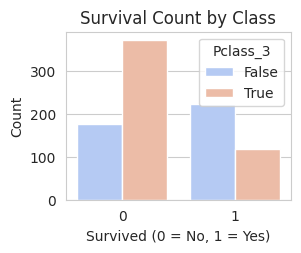

In [43]:
# 1. Survival Count by Class
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', hue='Pclass_3', data=df, palette='coolwarm')
plt.title("Survival Count by Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

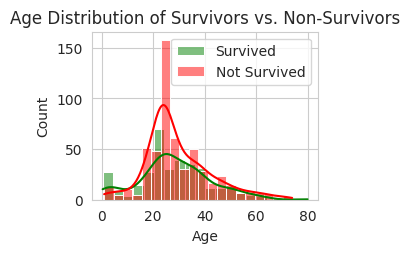

In [44]:
# 2. Age Distribution of Survivors vs. Non-Survivors
plt.subplot(2, 2, 2)
sns.histplot(df[df["Survived"] == 1]["Age"], bins=20, kde=True, color='green', label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=20, kde=True, color='red', label="Not Survived")
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Age")
plt.legend()

<ipython-input-45-596fb094ebad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette='coolwarm')


Text(0, 0.5, 'Fare')

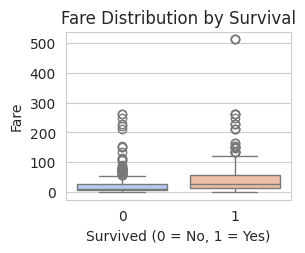

In [45]:
# 3. Survival Rate by Fare Range
plt.subplot(2, 2, 3)
sns.boxplot(x="Survived", y="Fare", data=df, palette='coolwarm')
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")

<ipython-input-46-24b6f101ebdb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=df, palette='viridis')


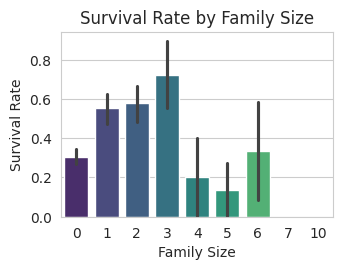

In [46]:
# 4. Family Size vs. Survival Rate
plt.subplot(2, 2, 4)
sns.barplot(x="FamilySize", y="Survived", data=df, palette='viridis')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")

plt.tight_layout()
plt.show()